# ÁRBOL DE DECISIÓN

---

El dataset usado en este análisis es obtenido de GITHUB, el que corresponde a registros de usuarios y su relación con el uso de internet en función de su sexo, edad y nivel de estudios.

OBJETIVO

Crear un modelo predictivo usando árbol de decisión, que sea capaz de predecir si ha usado internet usando la edad, el sexo y el nivel de estudios como variable de entrada.

VARIABLES


*   UNNAMED: 0 = Variable desconocida, no se considera en el análisis.
*   USO_INTERNET = Define si la persona ha usado internet (0 = NO, 1= SI)
*   SEXO = Género de la persona (Hombre/Mujer)
*   EDAD = Edad del usuario.
*   ESTUDIOS = Nivel de estudios del usuario (Sin Estudios/Medios Universitarios/Primaria/Segundaria/F.P.





In [1]:
# Se importan las librerias a utilizar en el árbol de decisión.
import pandas as pd
import numpy as np

In [2]:
# Usando la función READ de PANDAS, se cargan los datos al notebook.
df = pd.read_csv('https://raw.githubusercontent.com/sotastica/data/main/uso_internet_espana.csv')

In [3]:
# Se revisa brevemente como se comforman los datos del dataset.
df.sample(10)

,Unnamed: 0,uso_internet,sexo,edad,estudios
2139,2160,0,Hombre,74,Sin estudios
1943,1961,1,Mujer,58,Medios universitarios
456,459,0,Hombre,64,Primaria
1753,1770,0,Mujer,84,Primaria
1544,1559,1,Mujer,33,Primaria
2395,2416,0,Hombre,44,Primaria
104,106,1,Mujer,23,Primaria
371,374,1,Mujer,45,Secundaria
424,427,1,Mujer,29,Primaria
26,27,1,Mujer,24,F.P.


In [4]:
# Breve análisis descriptivo.
df.describe()

,Unnamed: 0,uso_internet,edad
count,2455.000000,2455.000000,2455.000000
mean,1238.422403,0.535642,46.798778
std,715.365693,0.498830,17.824150
min,1.000000,0.000000,18.000000
25%,619.500000,0.000000,32.000000
50%,1237.000000,1.000000,44.000000
75%,1857.500000,1.000000,61.000000
max,2475.000000,1.000000,95.000000


La edad de los participantes de la muestra se ubican en el rango de 18 a 96 años. El dataset se compone de 2455 filas y 5 columnas.

In [5]:
# Convertir variable categórica en variable indicador/dummie. (Aplica a variable SEXO y ESTUDIOS)
df = pd.get_dummies(data=df, drop_first = True)
df

,Unnamed: 0,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,1,0,66,1,0,1,0,0,0
1,2,1,72,0,0,1,0,0,0
2,3,1,48,0,1,0,0,0,0
3,4,0,59,0,0,0,0,0,1
4,5,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2450,2471,1,43,0,0,1,0,0,0
2451,2472,1,18,1,0,0,1,0,0
2452,2473,0,54,1,0,1,0,0,0
2453,2474,1,31,0,0,0,1,0,0



## SELECCIONAR VARIABLES
---
Se dividirán en variables explicativas y variable objetivo.

In [51]:
# Se define variable explicativa (VE)
ve = df[['edad','sexo_Mujer','estudios_Medios universitarios', 'estudios_Primaria', 'estudios_Secundaria','estudios_Sin estudios', 'estudios_Superiores']]
ve

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,66,1,0,1,0,0,0
1,72,0,0,1,0,0,0
2,48,0,1,0,0,0,0
3,59,0,0,0,0,0,1
4,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...
2450,43,0,0,1,0,0,0
2451,18,1,0,0,1,0,0
2452,54,1,0,1,0,0,0
2453,31,0,0,0,1,0,0


In [7]:
# Se define variable objetivo (VO)
vo = pd.DataFrame(df.uso_internet)
vo

,uso_internet
0,0
1,1
2,1
3,0
4,1
...,...
2450,1
2451,1
2452,0
2453,1


# ENTRENAMIENTO DEL MODELO ÁRBOL DE DECISIÓN

---



In [8]:
# Usando la librería de SKLEARN, se crea un modelo de árbol de decisión con una profundidad máxima de 3.
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth = 3)

In [9]:
# Se entrena el modelo siendo la variable X (variables explicativas (Sexo, Edad y Estudios), y variable objetivo (uso_internet))
modelo.fit(X= ve, y= vo)

DecisionTreeClassifier(max_depth=3)

# VISUALIZACIÓN DEL MODELO ÁRBOL DE DECISIÓN

---



In [12]:
# Una vez entrenado el modelo, se grafica usando MATPLOTLIB.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


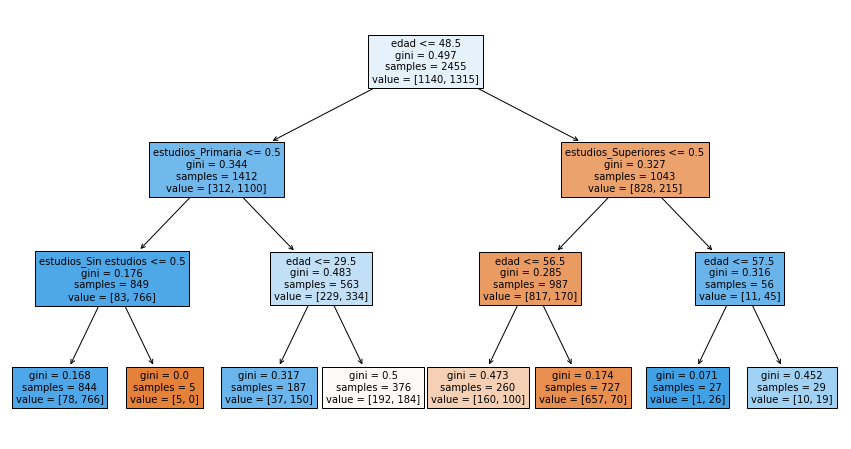

In [28]:
# Se obtiene el gráfico de árbol.
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo, feature_names=ve.columns, filled=True, fontsize=10);


# CÁLCULO DE PREDICCIÓN

---



In [39]:
# Para calcular la predicción, se obtiene una muestra aleatoria.
muestra = ve.sample()
muestra

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1280,64,1,0,0,0,1,0


In [40]:
 # De la muestra, se calcula la probabilidad de que hubiese usado internet en función de las variables explicativas.
 modelo.predict_proba(muestra)

array([[0.90371389, 0.09628611]])

La probabilidad de que una persona de 64 años, sexo femenino y sin estudios hubiese usado internet es de un 9,6% aprox, por lo que la probabilidad de que no hubiese usado internet es de un 90,4%.

# INTERPRETACIÓN DEL MODELO


---



In [41]:
# Se analiza brevemente el comportamiento de la variable EDAD, y conocer su nivel de importancia en el modelo.
import seaborn as sns

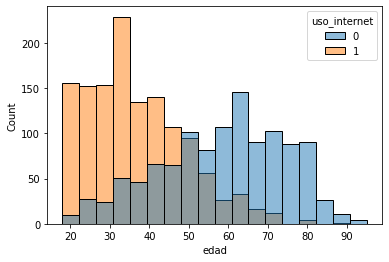

In [43]:
# Se crea un histograma de la variable EDAD y USO_INTERNET, las que segmentan de forma significativa el comportamiento de los usuarios.
sns.histplot(x=df.edad, hue=df.uso_internet)

La variable EDAD, es un determinante a la hora de explicar la probabilidad de uso de internet. Ya que según el histograma, se observa que esta variable es capaz de segmentar un público de entre 18 a 46 años que tiene alta probabilidad de usar internet, y otro del rango de 47 a 95 años que tiene alta probabilidad de no usar internet.

# CONFIABILIDAD DEL MODELO

---



In [45]:
y_pred = modelo.predict(ve)

In [54]:
# Se crea una columna llamada PRED, con los datos del modelo obtenido.
df['pred'] = y_pred
df.sample(10)[['uso_internet','pred']]

,uso_internet,pred
2359,0,0
551,0,0
2232,1,1
414,1,1
1844,0,0
125,0,0
235,0,1
2323,1,0
377,1,1
1318,1,0


Se observa que en los usuarios 2323 y 1318, ya fallado la predicción.

In [60]:
# Se compara si las prediciones del modelo coinciden con las de los datos reales.
df['uso_internet'] == df['pred']

0        True
1       False
2        True
3       False
4        True
        ...  
2450    False
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

In [59]:
# Porcentaje de acierto del modelo árbol de decisión.
(df['uso_internet'] == df['pred']).mean()

0.8044806517311609

#CONCLUSIÓN

---

Según el modelo de árbol de decisión obtenido, se observa que es capaz de predecir con un 80,4% de certeza si una persona de la muestra elegida al azar, ha usado internet. Estos datos son obtenidos por medio de las variables explicativas (VE), correspondiente a año, sexo y nivel de estudios. Además, se observa que la variable EDAD, es un determinante a la hora de clasificar los segmentos de personas que usan internet y quienes no lo usan.